In [1]:
# Setup path for imports
from forecast_n_optimization import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set professional style
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"

In [2]:
# Initialize everything
forecaster = EnergyPriceForecaster()
data_loader = DataLoader()
metrics = EvaluationMetrics()

In [3]:
X_da, y_da, da_summary = forecaster.prepare_day_ahead_data("Vilnius")
results_da = forecaster.train_day_ahead_model(X_da, y_da)

model_da = results_da["model"]
y_true_da = results_da["y_test"]
y_pred_da = results_da["y_test_pred"]
display_summary_md(da_summary, "Day-Ahead Data preparation Summary")
display_summary_md(results_da["summary"], "Day-Ahead CV & Test Summary")

Day-Ahead CV folds:   0%|          | 0/5 [00:00<?, ?it/s]

### Day-Ahead Data preparation Summary

| Metric           | Value                     |
|:-----------------|:--------------------------|
| Raw market rows  | 11424                     |
| Raw weather rows | 2856                      |
| Input features   | 14                        |
| Final rows       | 2856                      |
| Date start       | 2025-03-01 00:00:00+00:00 |
| Date end         | 2025-06-27 23:00:00+00:00 |
| Target min       | -22.65                    |
| Target max       | 773.0                     |
| Target mean      | 70.94545518207282         |

### Day-Ahead CV & Test Summary

| Metric       |    Value |
|:-------------|---------:|
| CV Mean MAE  | 14.9057  |
| CV Std MAE   |  6.52788 |
| CV Mean RMSE | 29.3131  |
| CV Std RMSE  | 16.9489  |

In [4]:
X_id, y_id, id_summary = forecaster.prepare_intraday_data("Vilnius")
results_id = forecaster.train_intraday_model(X_id, y_id)

model_id = results_id["model"]
y_true_id = results_id["y_test"]
y_pred_id = results_id["y_test_pred"]
display_summary_md(id_summary, "Intraday Data preparation Summary")
display_summary_md(results_id["summary"], "Intraday CV & Test Summary")

Intraday CV folds:   0%|          | 0/5 [00:00<?, ?it/s]

### Intraday Data preparation Summary

| Metric           | Value                     |
|:-----------------|:--------------------------|
| Raw weather rows | 2856                      |
| Raw market rows  | 11424                     |
| Weather features | 18                        |
| Lagged features  | 66                        |
| Final rows       | 9750                      |
| Date start       | 2025-03-14 14:45:00+00:00 |
| Date end         | 2025-06-27 23:45:00+00:00 |
| Target min       | -500.0                    |
| Target max       | 1500.0                    |
| Target mean      | 63.01234461538461         |

### Intraday CV & Test Summary

| Metric       |    Value |
|:-------------|---------:|
| CV Mean MAE  |  72.9045 |
| CV Std MAE   |  18.0871 |
| CV Mean RMSE | 137.518  |
| CV Std RMSE  |  52.7236 |

In [5]:
# Day-ahead -------------------------------------------------------
metrics_da = EvaluationMetrics.comprehensive_metrics(y_true_da, y_pred_da)
# Intraday --------------------------------------------------------
metrics_id = EvaluationMetrics.comprehensive_metrics(y_true_id, y_pred_id)

metrics_df = pd.DataFrame({"Day-Ahead": metrics_da, "Intraday": metrics_id})
# Build a mapping of each column to 2 decimal places
decimals = {col: 2 for col in metrics_df.columns}
metrics_df_rounded = metrics_df.round(decimals)

print("📊 Forecasting Metrics Comparison")
display(metrics_df_rounded)

📊 Forecasting Metrics Comparison


,Day-Ahead,Intraday
MAE,7.05,89.14
MSE,176.68,42178.85
RMSE,13.29,205.37
R2,0.92,0.49
Peak_Trough_Accuracy,0.42,0.31
High_Spread_Days,2.00,21.00
High_Spread_Percentage,8.33,100.00
Average_Daily_Spread,118.93,1237.61
Max_Daily_Spread,210.23,2000.00


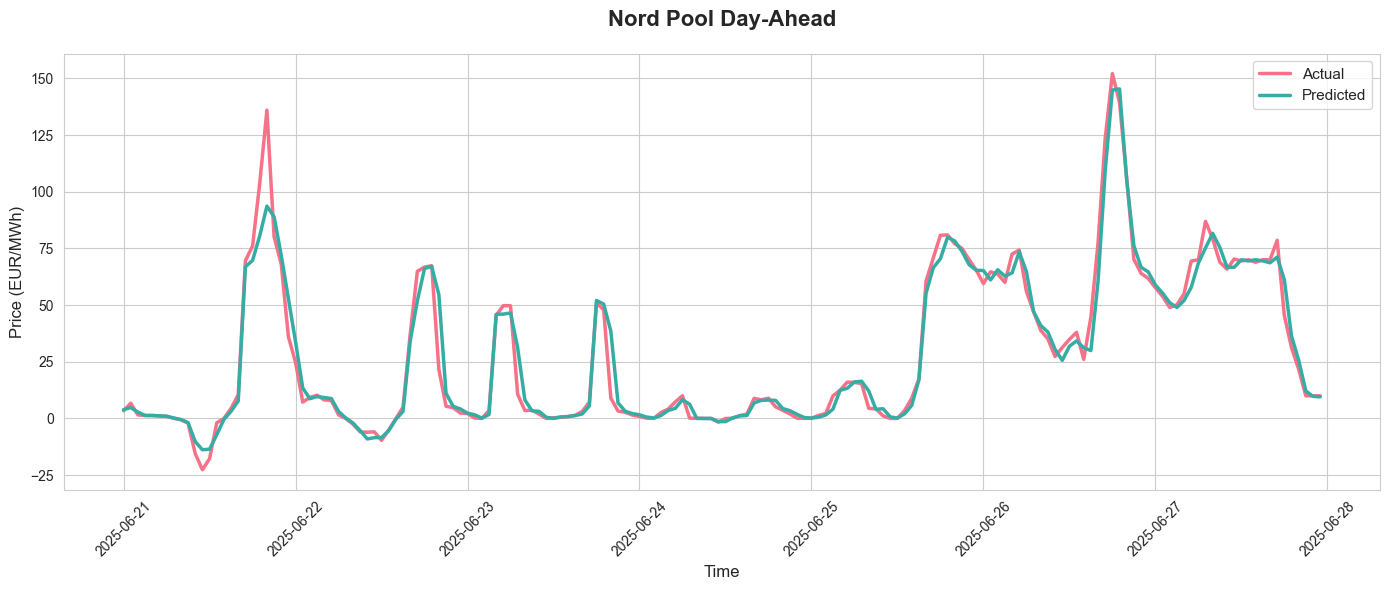

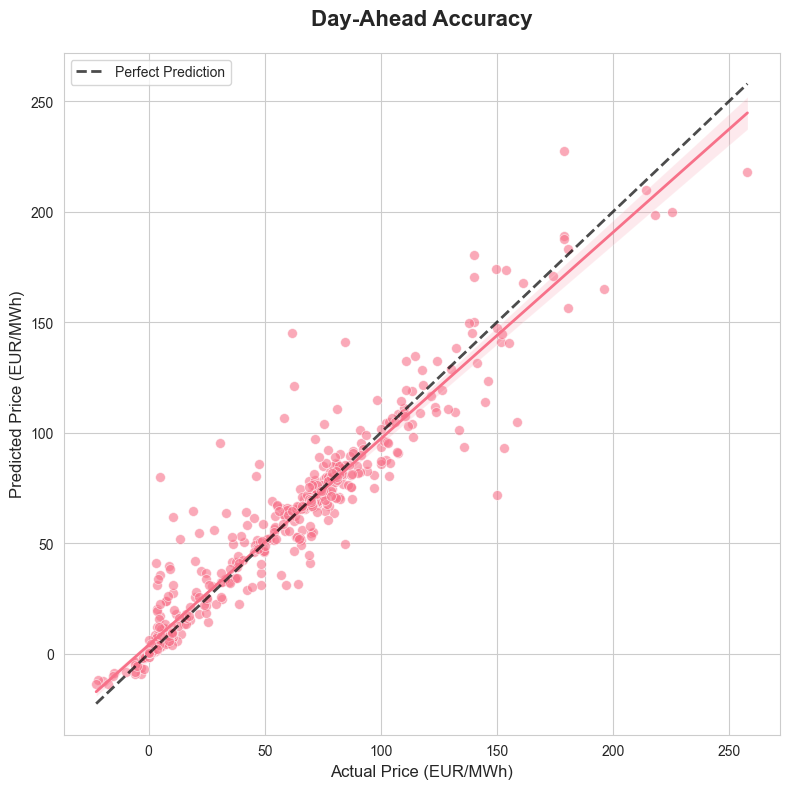

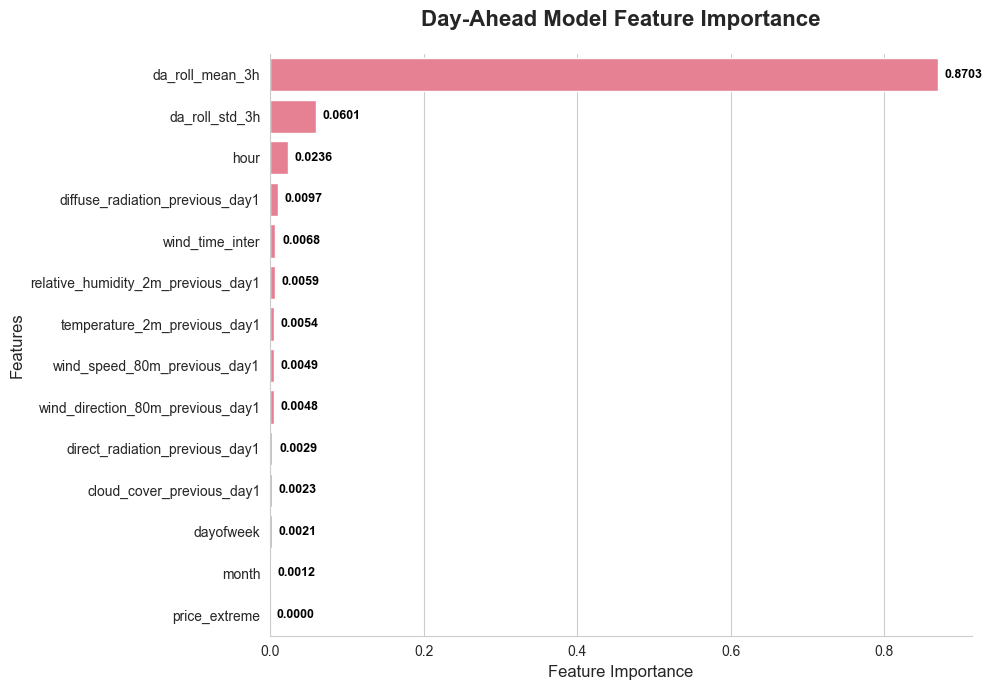

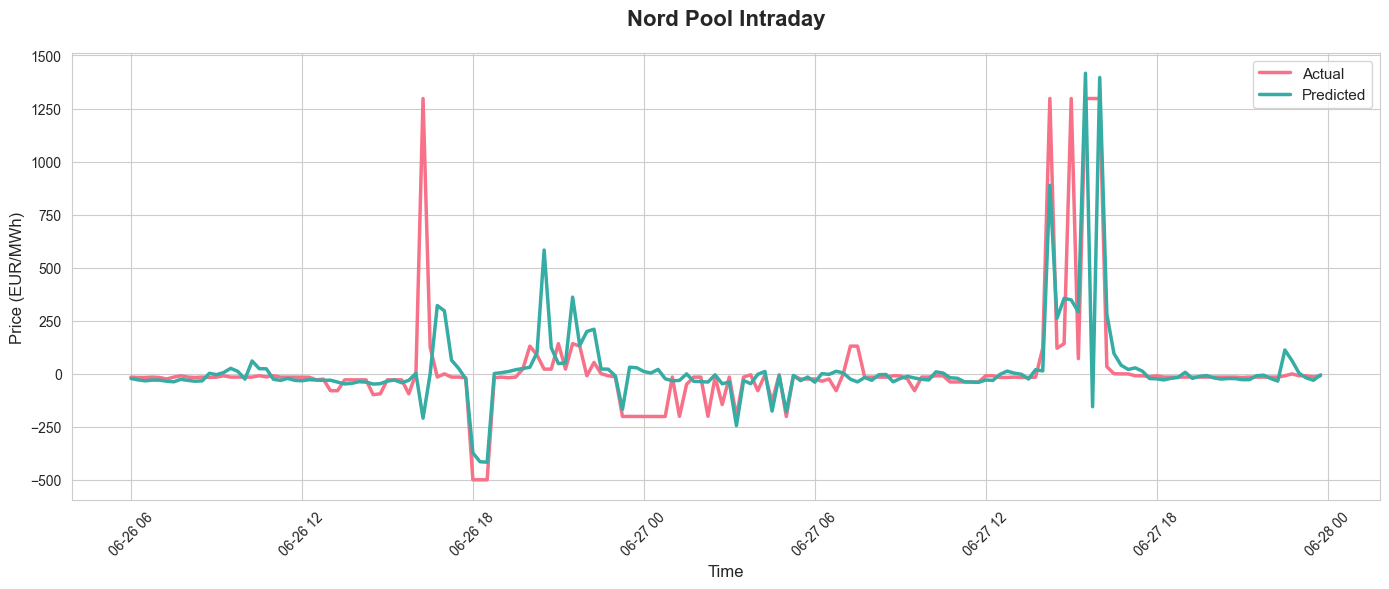

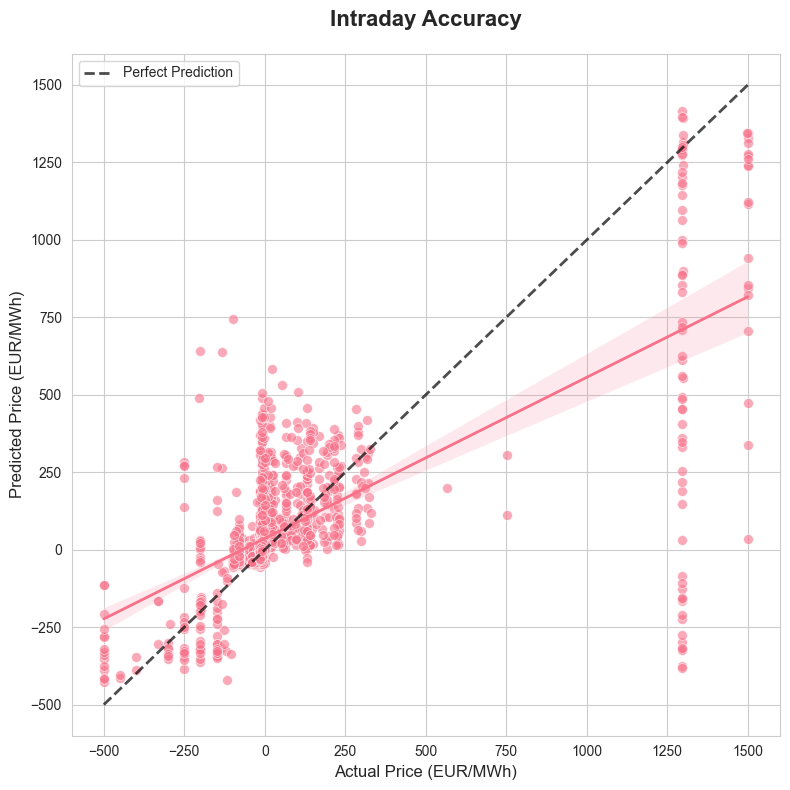

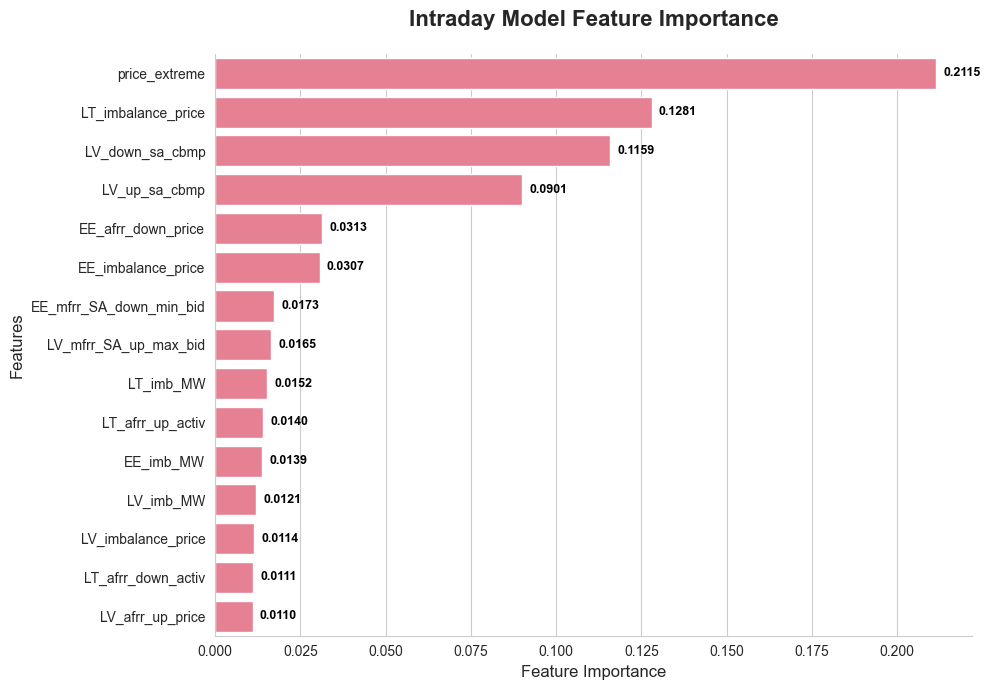

In [6]:
plot_seaborn_comparison(y_true_da, y_pred_da, "Nord Pool Day-Ahead")
plot_seaborn_scatter(y_true_da, y_pred_da, "Day-Ahead Accuracy")
feature_importance(
    model=model_da, X=X_da, title="Day-Ahead Model Feature Importance", top_n=15
)

plot_seaborn_comparison(y_true_id, y_pred_id, "Nord Pool Intraday")
plot_seaborn_scatter(y_true_id, y_pred_id, "Intraday Accuracy")
feature_importance(
    model=model_id, X=X_id, title="Intraday Model Feature Importance", top_n=15
)

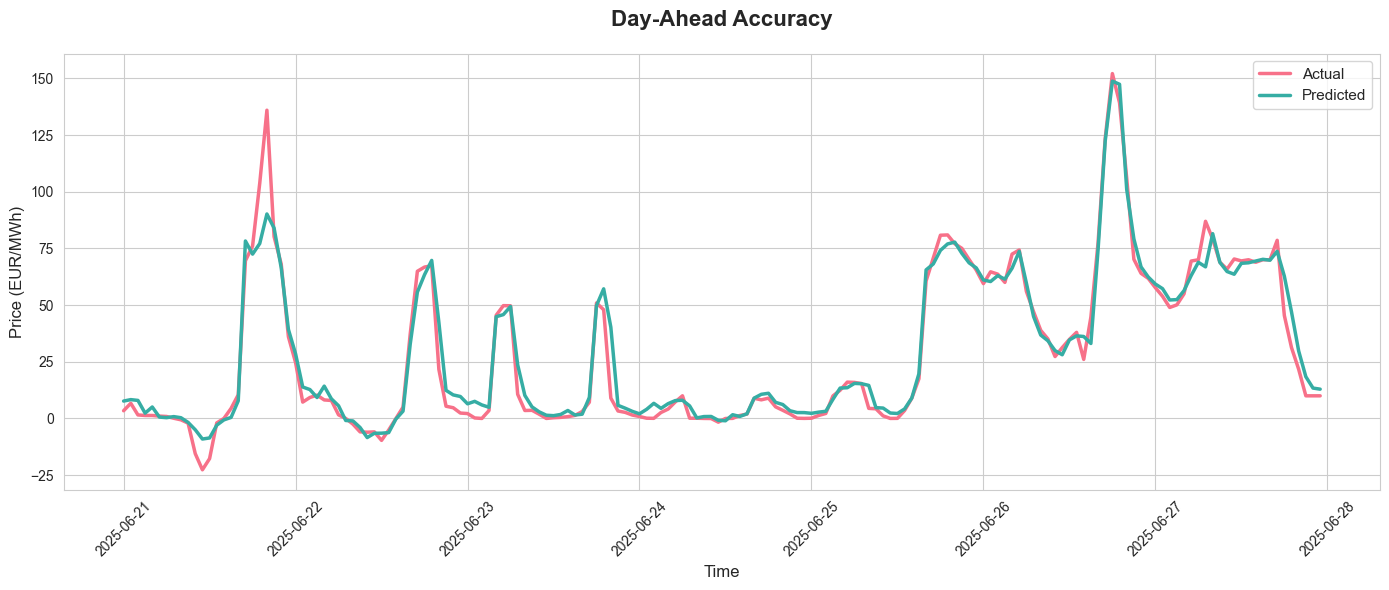

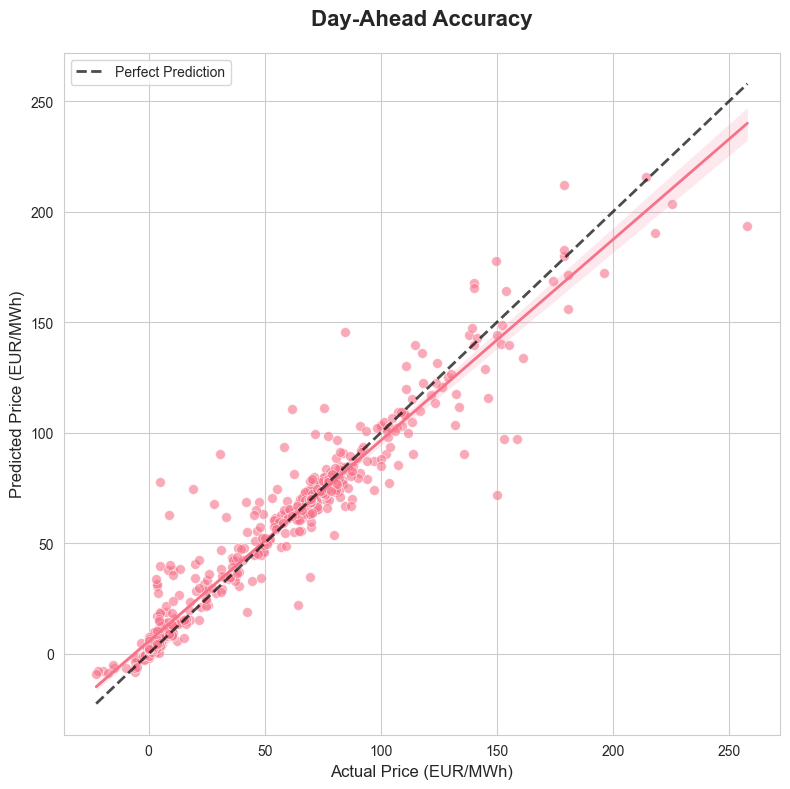

### Day-Ahead CV & Test Summary

| Metric       |     Value |
|:-------------|----------:|
| CV Mean MAE  |  15.1641  |
| CV Std MAE   |   7.95004 |
| CV Mean RMSE |  29.2144  |
| CV Std RMSE  |  18.5558  |
| Test MAE     |   6.84494 |
| Test RMSE    |  12.5052  |
| Best Rounds  | 265       |

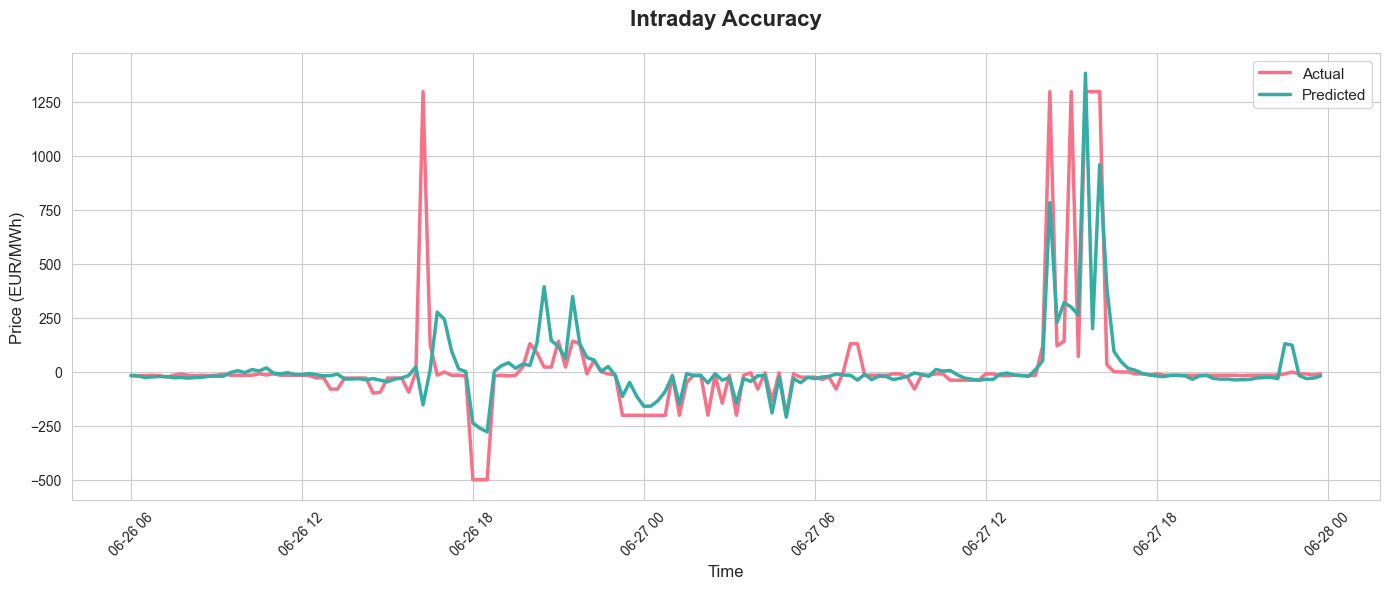

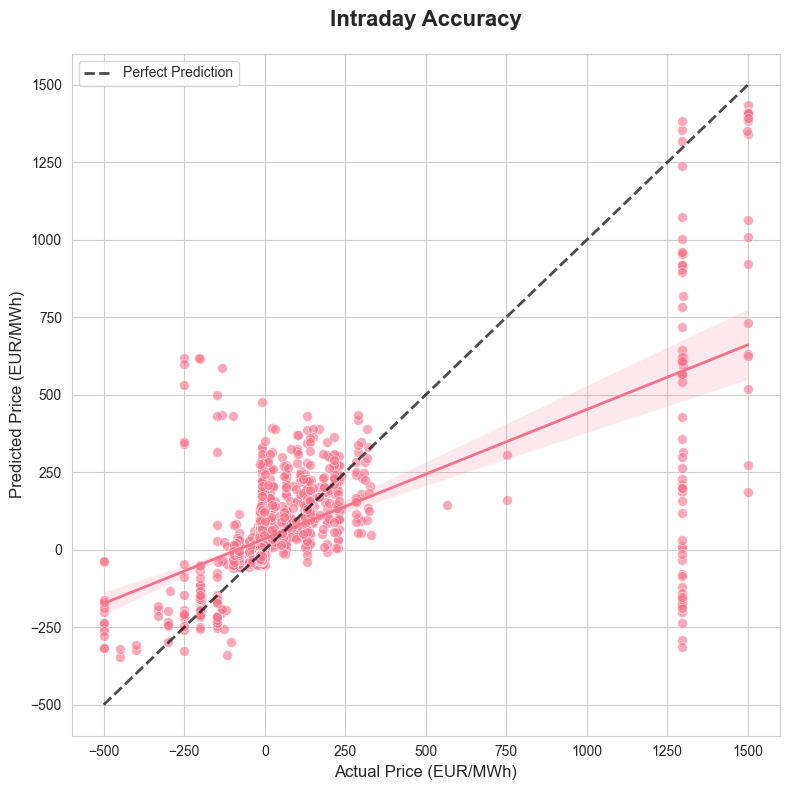

### Intraday CV & Test Summary

| Metric       |    Value |
|:-------------|---------:|
| CV Mean MAE  |  72.056  |
| CV Std MAE   |  17.934  |
| CV Mean RMSE | 140.064  |
| CV Std RMSE  |  51.1763 |
| Test MAE     |  88.3816 |
| Test RMSE    | 216.344  |
| Best Rounds  | 115      |

📊 Forecasting Metrics Comparison


,Intraday,Day-Ahead
MAE,88.38,6.84
MSE,46804.52,156.38
RMSE,216.34,12.51
R2,0.43,0.93
Peak_Trough_Accuracy,0.29,0.29
High_Spread_Days,21.00,2.00
High_Spread_Percentage,100.00,8.33
Average_Daily_Spread,1237.61,118.93
Max_Daily_Spread,2000.00,210.23


In [7]:
da_xgb = forecaster.train_xgboost(X_da, y_da)
id_xgb = forecaster.train_xgboost(X_id, y_id)

plot_seaborn_comparison(
    da_xgb["y_test"], da_xgb["y_test_pred"], "Day-Ahead Accuracy"
)

plot_seaborn_scatter(
    da_xgb["y_test"], da_xgb["y_test_pred"], "Day-Ahead Accuracy"
)
display_summary_md(da_xgb["summary"], "Day-Ahead CV & Test Summary")

plot_seaborn_comparison(
    id_xgb["y_test"], id_xgb["y_test_pred"], "Intraday Accuracy"
)

plot_seaborn_scatter(
    id_xgb["y_test"], id_xgb["y_test_pred"], "Intraday Accuracy"
)

display_summary_md(id_xgb["summary"], "Intraday CV & Test Summary")

xgb_metrics_df = pd.DataFrame(
    {"Intraday": id_xgb["test_metrics"], "Day-Ahead": da_xgb["test_metrics"]}
)
# Build a mapping of each column to 2 decimal places
decimals = {col: 2 for col in xgb_metrics_df.columns}
xgb_metrics_rounded = xgb_metrics_df.round(decimals)

print("📊 Forecasting Metrics Comparison")
display(xgb_metrics_rounded)